# Psychoinformatics - Week 10 (Exercises)
by your name (your email)

In [12]:
import warnings, numpy as np
import xgboost
from matplotlib.pyplot import *
%matplotlib inline
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn import *
import copy

# 1 執行並觀察以下的機器學習結果 (2分)

## 1.0 IRIS dataset & Ensemble model function

In [3]:
iris = datasets.load_iris()
X=iris.data
Y=iris.target

In [13]:
np.random.seed(0)
sss=model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.1)
def EnsembleModels(og_model, Max_n_estimators):
    accs=[] # mean cross-validation accuracies of the models w/ different n_estimators from 1..Max_n_estimators
    for n in range(1,Max_n_estimators+1):  
        print(n,end=' ') # showing progress
        acc=[] # cross-validation accuracies of the ensemble model w/ n_estimators=n
        for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation of one ensemble model
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]
            model=copy.deepcopy(og_model) # to avoid possible model re-training
            model.n_estimators=n
            model.fit(X_train[:,0:2],Y_train) #training
            acc.append(model.predict(X_test[:,0:2])==Y_test) 
        accs.append(np.mean(acc)) # aggregating mean cross-validation accuracies across all the ensemble models
    return(accs)

## 1.1 Bagging (Bootstrap Aggregating)

### 1.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

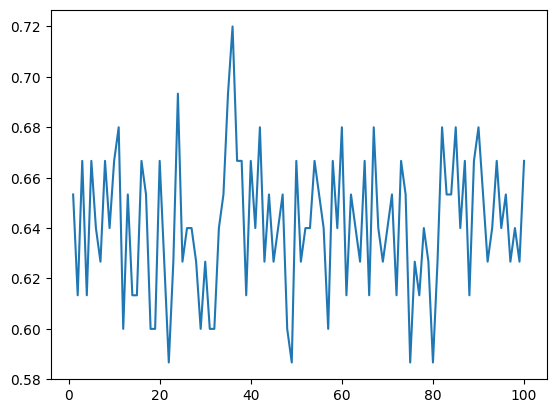

In [14]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

### 1.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

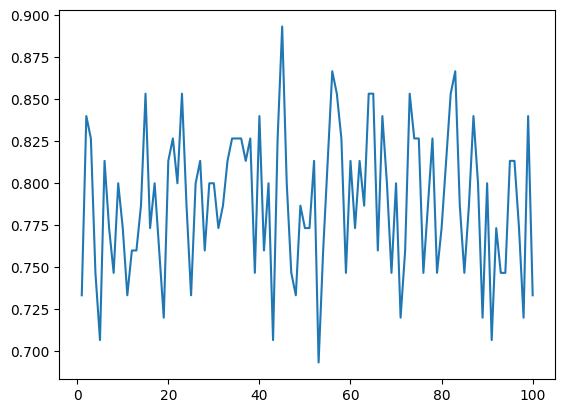

In [15]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

## 1.2 Boosting

### 1.2.1 AdaBoost

#### 1.2.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

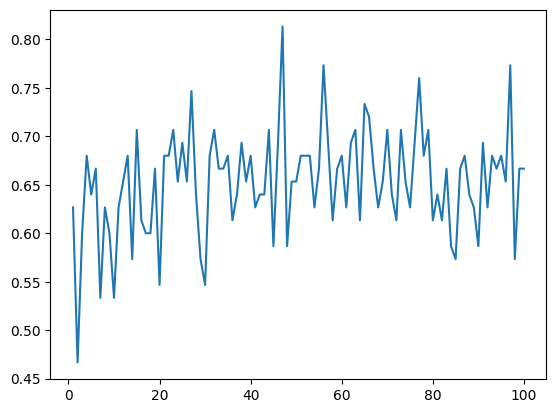

In [22]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

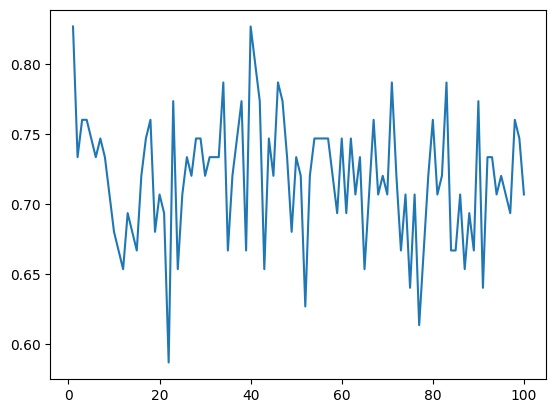

In [17]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

### 1.2.2 Gradient Boosting

The following two implementations are conceptually identical but XGBoost is more resource-efficient and can be parallelized/distributed.

#### 1.2.2.1 Scikit-learn's Gradient Tree Boosting

##### 1.2.2.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

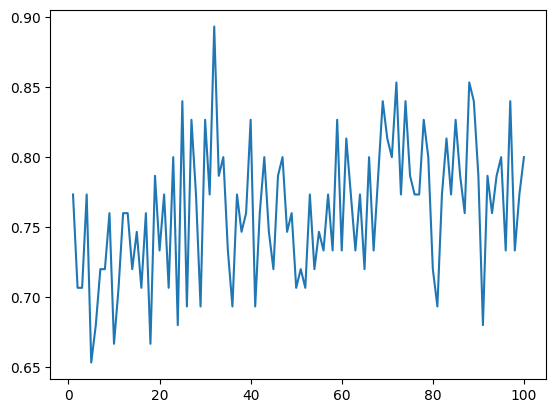

In [18]:
model=ensemble.GradientBoostingClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### 1.2.2.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

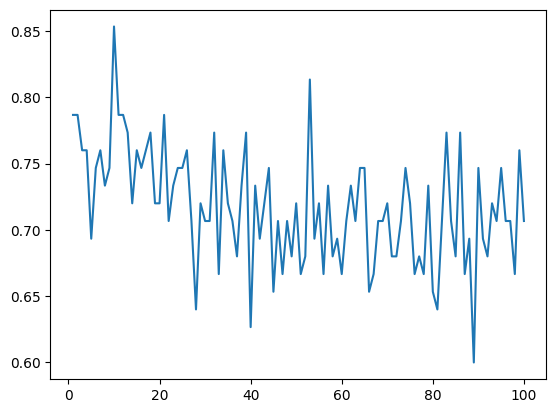

In [19]:
model=ensemble.GradientBoostingClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.2.2 XGBoost (eXtreme Gradient Boosting)

##### 1.2.2.2.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

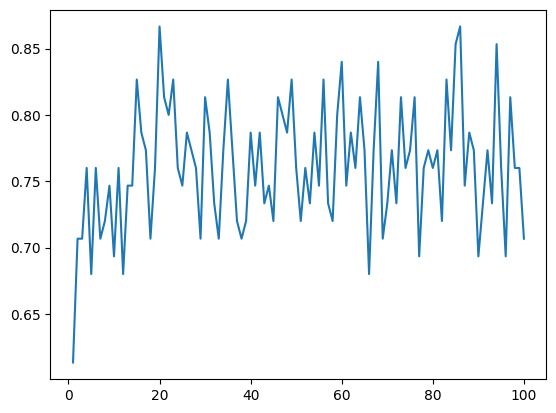

In [24]:
model=xgboost.XGBClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### 1.2.2.2.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

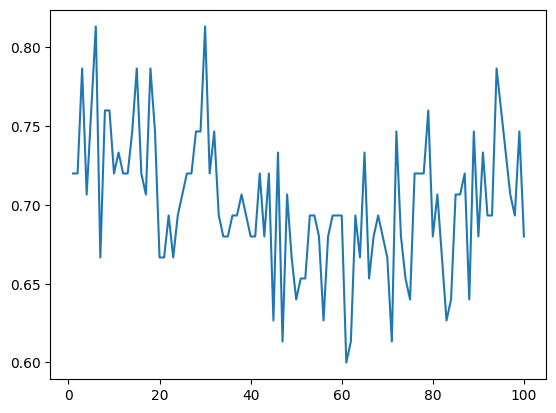

In [21]:
model=xgboost.XGBClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

# 2 根據以上的觀察回答以下的問題 (6 分)

## 2.1 在Bagging時, 1.1.2中複雜模型的正確率是否比1.1.1簡單模型的正確率好或差? 為什麼 (2分)

Please write your answers here.

## 2.2 在Boosting時, 1.2.1.2/1.2.2.1.2/1.2.2.2.2中複雜模型的正確率是否比1.2.1.1/1.2.2.1.1/1.2.2.2.1中相對應的簡單模型正確率好或差? 為什麼 (2分)

Please write your answers here.

## 2.3 為何只有Boosting在簡單模型時(1.2.1.1/1.2.2.1.1/1.2.2.2.1)，正確率大致上會隨著n_estimators數目變多而增加，但Bagging和複雜的Boosting模型卻不是如此? (2分)

Please write your answers here.